In [ ]:
import pandas as pd

data = pd.read_csv("superclass.csv")

print(data.head())

      rt_pred        rt        InChIKey  \
0   75.397250   77.1928  AADLTHQNYQJHQV   
1  129.116760  125.9340  VLDVBZICYBVQHB   
2   65.089860   15.0727  NZCRJKRKKOLAOJ   
3   15.516204   17.4320  MLKXDPUZXIRXEP   
4   80.972050   91.0198  QMWWVWNGLRKGLD   

                                              SMILES  \
0  CCCCCCCCCCCCCCCCCCCC(=O)N[C@@H](COP(=O)([O-])O...   
1                 CC(C)C(C(=O)O)NC(=O)C(CC1=CN=CN1)N   
2  CC1C=CC=C(C(=O)NC2=C(C3=C(C4=C(C(=C3O)C)OC(C4=...   
3  CC1=C(C2=C(C1=CC3=CC=C(C=C3)S(=O)C)C=CC(=C2)F)...   
4  CC(CCC(=O)NCCCCCN)C1CCC2C3C(O)CC4CC(O)CCC4(C)C...   

                      superclass  
0  Organic acids and derivatives  
1  Organic acids and derivatives  
2       Organic oxygen compounds  
3  Organic acids and derivatives  
4  Organic acids and derivatives  


In [ ]:
import numpy as np

data['absolute_error'] = abs(data['rt'] - data['rt_pred'])
mae = data['absolute_error'].mean()

medae = data['absolute_error'].median()

data['squared_error'] = (data['rt'] - data['rt_pred'])**2
rmse = np.sqrt(data['squared_error'].mean())

data['relative_error'] = abs(data['rt'] - data['rt_pred']) / data['rt']
mre = data['relative_error'].mean()

ss_total = ((data['rt'] - data['rt'].mean())**2).sum()
ss_residual = data['squared_error'].sum()
r2 = 1 - (ss_residual / ss_total)

print(f"MAE: {mae}, MedAE: {medae}, RMSE: {rmse}, MRE: {mre}, R²: {r2}")

MAE: 16.704828058893032, MedAE: 9.212115000000004, RMSE: 27.901344797454524, MRE: 0.35978069117440986, R²: 0.6703676715797171


In [ ]:

grouped_metrics = data.groupby('superclass').agg(
    mae=('absolute_error', 'mean'),
    medae=('absolute_error', 'median'),
    rmse=('squared_error', lambda x: np.sqrt(x.mean())),
    mre=('relative_error', 'mean'),
    count=('absolute_error', 'size')
).reset_index()


print(grouped_metrics)

                                 superclass        mae      medae       rmse  \
0                 Alkaloids and derivatives  16.096154   9.997455  19.681850   
1                                Benzenoids  16.704875   8.047647  26.601901   
2           Homogeneous non-metal compounds  45.558260  45.558260  45.558260   
3           Lipids and lipid-like molecules  14.230264   7.983168  23.027259   
4   Nucleosides, nucleotides, and analogues  22.457104  19.249100  28.723495   
5             Organic acids and derivatives  14.528689   8.815931  21.924101   
6                Organic nitrogen compounds  21.105111  12.798015  31.065951   
7                  Organic oxygen compounds  24.849419  10.581950  52.632385   
8                   Organohalogen compounds   3.609944   4.198380   3.744834   
9              Organoheterocyclic compounds  19.537009  11.285310  30.117777   
10                 Organometallic compounds   2.004761   2.004761   2.601736   
11                   Organosulfur compou

In [ ]:
sample_threshold = 10

superclass_counts = data['superclass'].value_counts()

valid_superclasses = superclass_counts[superclass_counts >= sample_threshold].index

filtered_data = data[data['superclass'].isin(valid_superclasses)]

grouped_metrics = filtered_data.groupby('superclass').agg(
    mae=('absolute_error', 'mean'),
    medae=('absolute_error', 'median'),
    rmse=('squared_error', lambda x: np.sqrt(x.mean())),
    mre=('relative_error', 'mean'),
    count=('absolute_error', 'size')
).reset_index()

print(grouped_metrics)

                                superclass        mae      medae       rmse  \
0                               Benzenoids  16.704875   8.047647  26.601901   
1          Lipids and lipid-like molecules  14.230264   7.983168  23.027259   
2  Nucleosides, nucleotides, and analogues  22.457104  19.249100  28.723495   
3            Organic acids and derivatives  14.528689   8.815931  21.924101   
4               Organic nitrogen compounds  21.105111  12.798015  31.065951   
5                 Organic oxygen compounds  24.849419  10.581950  52.632385   
6             Organoheterocyclic compounds  19.537009  11.285310  30.117777   
7         Phenylpropanoids and polyketides  14.916607   5.469830  27.320126   

        mre  count  
0  0.442198    215  
1  0.379772    229  
2  0.229590     37  
3  0.221638    653  
4  0.416820     42  
5  0.792317    115  
6  0.448644    270  
7  0.288012     34  


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.draw()
<ipython-input-2-e81823ecffa3>:37: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from current font.
  plt.tight_layout()
<ipython-input-2-e81823ecffa3>:37: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from current font.
  plt.tight_layout()
<ipython-input-2-e81823ecffa3>:37: UserWarning: Glyph 

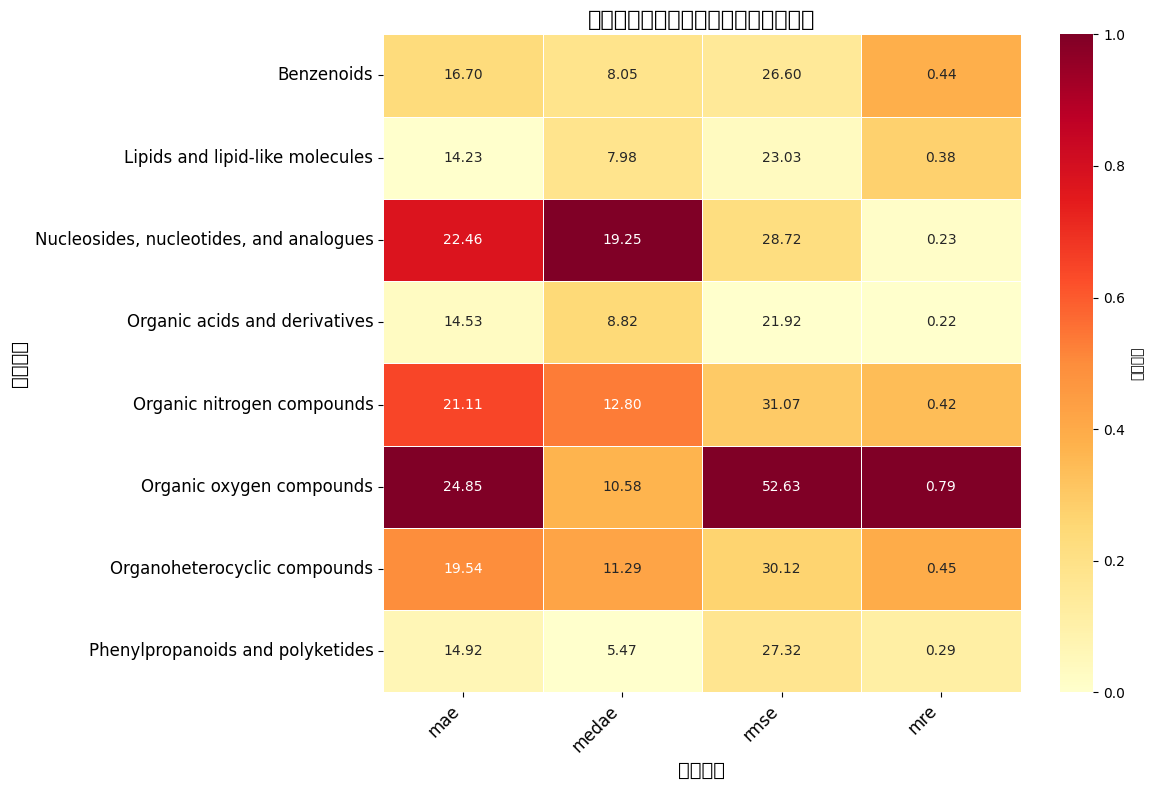

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

grouped_metrics_data = {
    'superclass': [
        'Benzenoids', 'Lipids and lipid-like molecules', 'Nucleosides, nucleotides, and analogues',
        'Organic acids and derivatives', 'Organic nitrogen compounds',
        'Organic oxygen compounds', 'Organoheterocyclic compounds',
        'Phenylpropanoids and polyketides'
    ],
    'mae': [16.704875, 14.230264, 22.457104, 14.528689, 21.105111, 24.849419, 19.537009, 14.916607],
    'medae': [8.047647, 7.983168, 19.249100, 8.815931, 12.798015, 10.581950, 11.285310, 5.469830],
    'rmse': [26.601901, 23.027259, 28.723495, 21.924101, 31.065951, 52.632385, 30.117777, 27.320126],
    'mre': [0.442198, 0.379772, 0.229590, 0.221638, 0.416820, 0.792317, 0.448644, 0.288012]
}
metrics_df = pd.DataFrame(grouped_metrics_data)


metrics_df.set_index('superclass', inplace=True)

normalized_df = metrics_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))


plt.figure(figsize=(12, 8))
sns.heatmap(
    normalized_df, annot=metrics_df, fmt=".2f", cmap="YlOrRd",
    cbar_kws={'label': 'Normalized'}, linewidths=0.5
)
plt.title("Heatmap of Error Metrics by Chemical Superclass (Single Color Scheme)", fontsize=16)
plt.ylabel("Chemical Superclass", fontsize=14)
plt.xlabel("Error Metrics", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
data =filtered_data

In [ ]:
data['mae'] = abs(data['rt'] - data['rt_pred'])

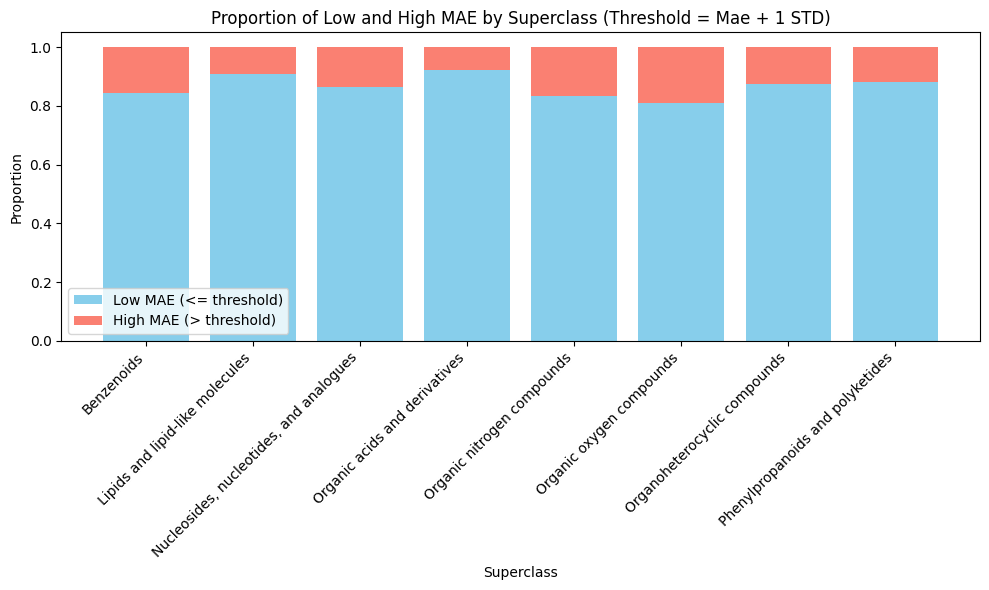

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

threshold = data['mae'].mean() + data['mae'].std()

data['low_mae'] = data['mae'] <= threshold

grouped = data.groupby('superclass').agg(
    low_mae_ratio=('low_mae', lambda x: x.mean()),
    high_mae_ratio=('low_mae', lambda x: 1 - x.mean())
).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    grouped['superclass'], grouped['low_mae_ratio'],
    label='Low MAE (<= threshold)', color='skyblue'
)
ax.bar(
    grouped['superclass'], grouped['high_mae_ratio'],
    bottom=grouped['low_mae_ratio'], label='High MAE (> threshold)', color='salmon'
)


ax.set_title(f"Proportion of Low and High MAE by Superclass (Threshold = Mae + 1 STD)")
ax.set_xlabel("Superclass")
ax.set_ylabel("Proportion")
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

<ipython-input-28-d618c713458b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='superclass', y='mae', palette='Blues')


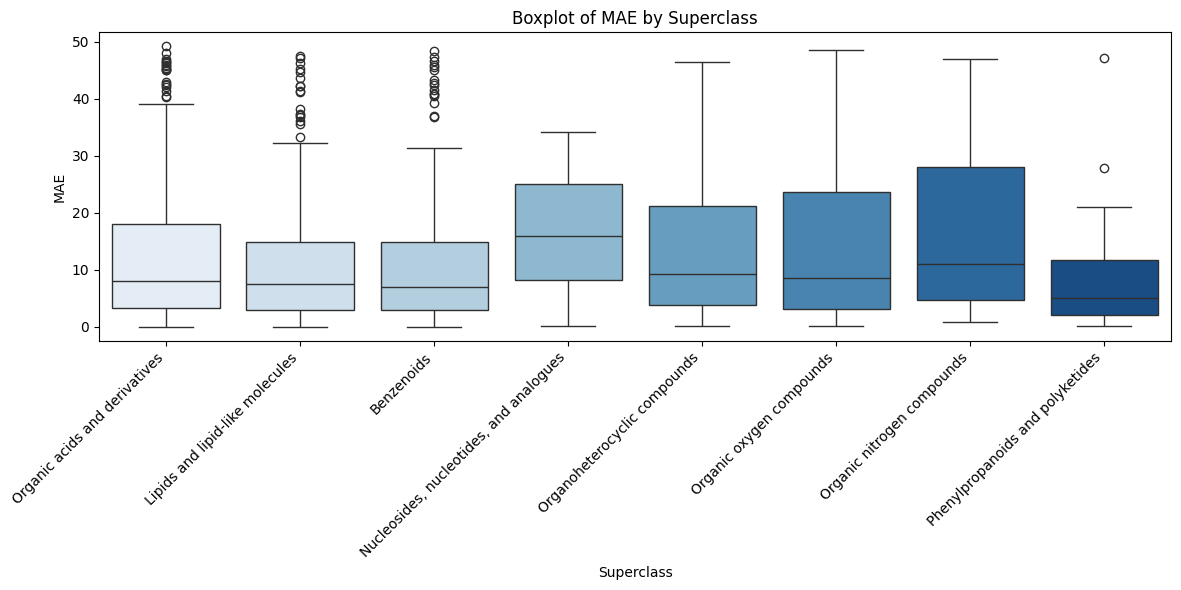

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Q1 = data['mae'].quantile(0.25)
Q3 = data['mae'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data['mae'] >= lower_bound) & (data['mae'] <= upper_bound)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='superclass', y='mae', palette='Blues')

plt.xticks(rotation=45, ha='right')
plt.title("Boxplot of MAE by Superclass")
plt.xlabel("Superclass")
plt.ylabel("MAE")
plt.tight_layout()
plt.show()

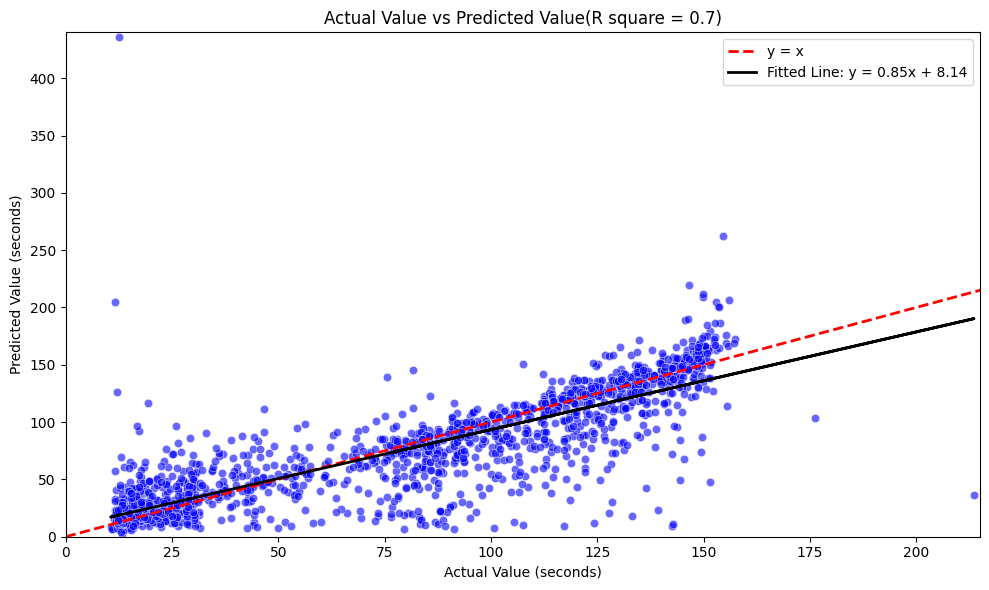

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


data = pd.read_csv("superclass.csv")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='rt', y='rt_pred', data=data, alpha=0.6, color='blue')


plt.plot([0, 250], [0, 250], color='red', linestyle='--', linewidth=2, label="y = x")

X = data['rt'].values.reshape(-1, 1)
y = data['rt_pred'].values
model = LinearRegression()
model.fit(X, y)
line = model.predict(X)
plt.plot(data['rt'], line, color='black', linestyle='-', linewidth=2, label=f"Fitted Line: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

plt.title("Actual Value vs Predicted Value(R square = 0.7)")
plt.xlabel("Actual Value (seconds)")
plt.ylabel("Predicted Value (seconds)")
plt.legend()

plt.xlim(0, 215)
plt.ylim(0, 440)

plt.tight_layout()
plt.show()

In [ ]:
data = pd.read_csv("superclass.csv")

data['abs_error'] = abs(data['rt_pred'] - data['rt'])

filtered_data = data.groupby('superclass').filter(lambda x: len(x) >= 10)


grouped = filtered_data.groupby('superclass').agg(
    mean_abs_error=('abs_error', 'mean'),
    sample_size=('abs_error', 'size')
).reset_index()

high_error_classes = grouped.sort_values(by='mean_abs_error', ascending=False)

print(high_error_classes)

high_error_classes.to_csv("high_error_superclasses.csv", index=False)

                                superclass  mean_abs_error  sample_size
5                 Organic oxygen compounds       24.849419          115
2  Nucleosides, nucleotides, and analogues       22.457104           37
4               Organic nitrogen compounds       21.105111           42
6             Organoheterocyclic compounds       19.537009          270
0                               Benzenoids       16.704875          215
7         Phenylpropanoids and polyketides       14.916607           34
3            Organic acids and derivatives       14.528689          653
1          Lipids and lipid-like molecules       14.230264          229


In [2]:
import pandas as pd

data = pd.read_csv("superclass.csv")

filtered_data = data.groupby('superclass').filter(lambda x: len(x) >= 10)

sample_counts = filtered_data['superclass'].value_counts().to_dict()

filtered_data['abs_error'] = abs(filtered_data['rt'] - filtered_data['rt_pred'])

filtered_data['sample_count'] = filtered_data['superclass'].map(sample_counts)

sorted_data = filtered_data.sort_values(by='abs_error', ascending=False)

high_error_superclass = sorted_data[['superclass', 'abs_error', 'sample_count']].head(10)

print("Outliers: Prediction information for compounds with the highest MAE errors")
print(high_error_superclass)


high_error_superclass.to_csv("high_error_superclass_with_counts.csv", index=False)


Outliers: Prediction information for compounds with the highest MAE errors

                           superclass   abs_error  sample_count
333          Organic oxygen compounds  423.305460           115
1334         Organic oxygen compounds  192.754520           115
1158     Organoheterocyclic compounds  176.809135           270
1079         Organic oxygen compounds  133.440749           115
1173  Lipids and lipid-like molecules  132.112466           229
430        Organic nitrogen compounds  115.687260            42
1199                       Benzenoids  115.147396           215
938   Lipids and lipid-like molecules  114.138440           229
1426                       Benzenoids  111.860054           215
578      Organoheterocyclic compounds  107.506923           270


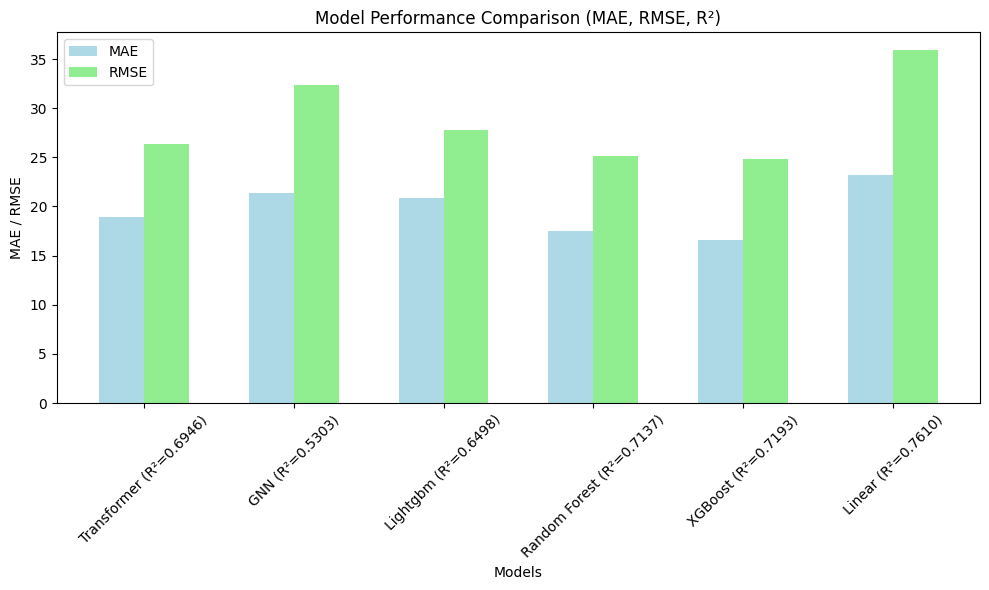

In [3]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Transformer', 'GNN', 'Lightgbm', 'Random Forest', 'XGBoost', 'Keras', 'Linear']
mae = [18.88, 21.36, 20.88, 17.49, 16.58, 27.18, 23.22]
rmse = [26.37, 32.33, 27.76, 25.1, 24.85, 33.23, 35.92]
r_square = [0.6946, 0.5303, 0.6498, 0.7137, 0.7193, 0.51, 0.761]

models_filtered = [model for model in models if model != 'Keras']
mae_filtered = [value for model, value in zip(models, mae) if model != 'Keras']
rmse_filtered = [value for model, value in zip(models, rmse) if model != 'Keras']
r_square_filtered = [value for model, value in zip(models, r_square) if model != 'Keras']

fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.3

index = np.arange(len(models_filtered))

bar1 = ax1.bar(index - bar_width / 2, mae_filtered, bar_width, label='MAE', color='lightblue')
bar2 = ax1.bar(index + bar_width / 2, rmse_filtered, bar_width, label='RMSE', color='lightgreen')

labels = [f'{model} (R²={r:.4f})' for model, r in zip(models_filtered, r_square_filtered)]

ax1.set_xlabel('Models')
ax1.set_ylabel('MAE / RMSE')
ax1.set_title('Model Performance Comparison (MAE, RMSE, R²)')
ax1.set_xticks(index)
ax1.set_xticklabels(labels, rotation=45)
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()